1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

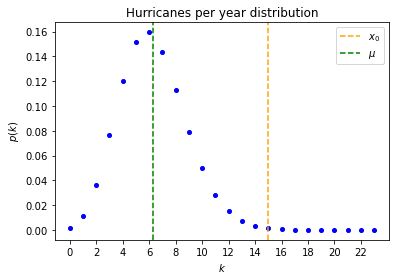

In [3]:
mean = 6.3
x0 = 15

# plot hurricanes pmf
k = np.arange(0,24)
y = stats.poisson.pmf(k, mean)
plt.plot(k, y, 'bo', ms=4)
plt.axvline(x0, ls='--', c='orange', label='$x_0$')
plt.axvline(mean, ls='--', c='green', label='$\mu$')
plt.ylabel("$p(k)$")
plt.xlabel("$k$")
plt.title('Hurricanes per year distribution')
plt.xticks(range(0, len(k), 2))
plt.legend()
plt.show()

In [8]:
Z = abs(x0 - mean) / math.sqrt(mean)
print(f"Z score = {Z:.3f}")
# consider statistically significant a probability that has a Z score of 3 or larger
thres  = stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

print(f'p-value = {pvalue:.4f}')

print(f'Is {x0} statistically significant?', 'Yes' if pvalue >= thres else 'No')

Z score = 3.466
p-value = 0.0005
Is 15 statistically significant? No


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [11]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(post)
sigma_1 = np.sqrt(np.var(pre, ddof=1))
sigma_2 = np.sqrt(np.var(post, ddof=1))
sigma = math.sqrt((sigma_1**2+sigma_2**2)/2)

x_1 = np.mean(pre)
x_2 = np.mean(post)
T = (x_1-x_2)/(sigma*math.sqrt(2/n))

print("T: ",T)

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))

print("pvalue: ", pvalue)
print("Since the p-value is <𝛼/2 thus we reject the null hypothesis")
print("So, the change in blod pressure is significant")

T:  -3.786997938137629
pvalue:  0.004302464132864604
Since the p-value is <𝛼/2 thus we reject the null hypothesis
So, the change in blod pressure is significant


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

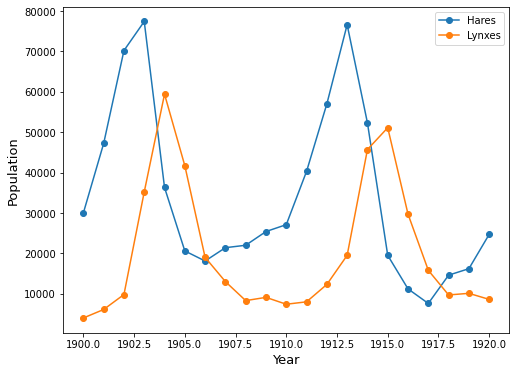

In [18]:
from scipy import fftpack

year, hares, lynxes, _ = np.loadtxt('data/populations.txt').T

plt.figure(figsize=(8, 6))
plt.plot(year, hares, marker='o', label='Hares')
plt.plot(year, lynxes, marker='o', label='Lynxes')
plt.xlabel("Year", fontsize=13)
plt.ylabel("Population", fontsize=13)
plt.legend(loc="best", markerscale=1)

In [20]:
# FFT of the signals
sig_h = fftpack.fft(hares)
sig_l = fftpack.fft(lynxes)

# And the power (sig_fft is of complex dtype)
power_h = np.abs(sig_h) # these are the "weights" of the Fourier components for each discrete frequency interval
power_l = np.abs(sig_l)

time_step = 1.

# frequencies
freq_h = fftpack.fftfreq(hares.size, d=time_step) 
freq_l = fftpack.fftfreq(lynxes.size, d=time_step)

# Find the peak frequency: focus only on only the positive frequencies
pos_mask = np.where(freq_h > 0)
freqs_h = freq_h[pos_mask]
powes_h = power_h[pos_mask]

pos_mask = np.where(freq_l > 0)
freqs_l = freq_l[pos_mask]
powes_l = power_l[pos_mask]

# find the max of freqs array
peak_freq_h = freqs_h[powes_h.argmax()]
print("Peak frequency Hares:", peak_freq_h)
peak_freq_l = freqs_l[powes_l.argmax()]
print("Peak frequency Lynxes:", peak_freq_l)

Peak frequency Hares: 0.09523809523809523
Peak frequency Lynxes: 0.09523809523809523


Text(0.5, 0, 'Frequency [Hz]')

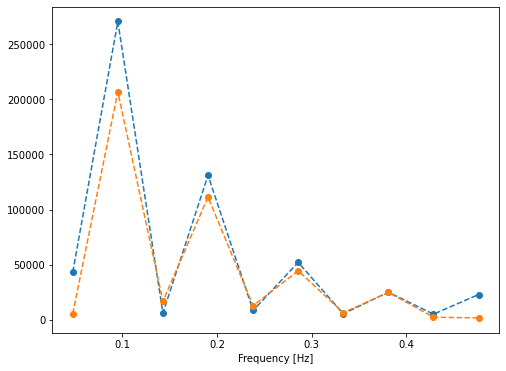

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(freqs_h, powes_h, marker='o', linestyle='--')
plt.plot(freqs_l, powes_l, marker='o', linestyle='--')
plt.xlabel('Frequency [Hz]')

In [24]:
hares_T  = 1. / freqs_h[np.argmax(powes_h)]
lynxes_T = 1. / freqs_l[np.argmax(powes_l)]
print('period hares  = ', hares_T)
print('period lynxes = ', lynxes_T)

period hares  =  10.5
period lynxes =  10.5


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

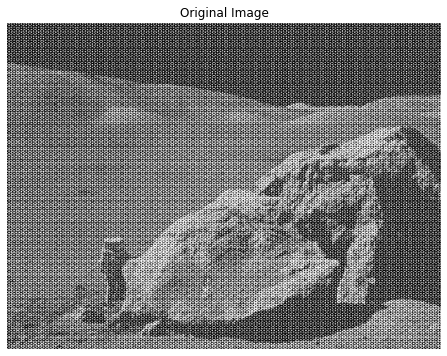

In [27]:
#image
im = plt.imread("data/moonlanding.png").astype(float)

# plot layout
plt.figure(figsize=(12,6))
plt.title("Original Image")
plt.axis('off')

# plot
plt.imshow(im, cmap="gray")
plt.show()

Text(0.5, 1.0, 'Fourier transform')

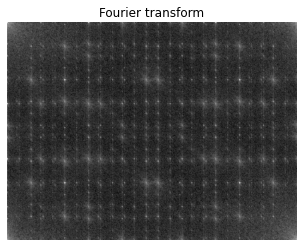

In [33]:
from matplotlib.colors import LogNorm

#image = np.pad(image, pad_width=((0,image.shape[0]),(0,image.shape[1])))
im_fft = fftpack.fft2(im)

plt.figure()
plt.imshow(np.abs(im_fft), cmap='gray', norm=LogNorm(vmin=5))
plt.axis("off")
plt.title('Fourier transform')

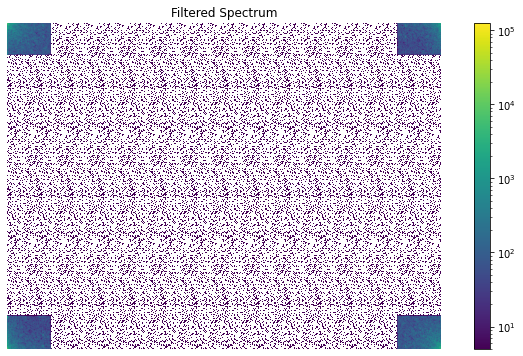

In [37]:
# threshold of coefficients
frac = 0.1

# analysis
im_fft2 = im_fft.copy()
rows, cols = im_fft2.shape

# region selections
im_fft2[int(rows*frac):int(rows*(1-frac))] = 0 # rows
im_fft2[:, int(cols*frac):int(cols*(1-frac))] = 0 # columns

# plot layout
plt.figure(figsize=(12,6))
plt.title("Filtered Spectrum")
plt.axis('off')

# plot with a logarithmic colormap
spectrum2 = plt.imshow(np.abs(im_fft2), norm=LogNorm(vmin=5))
plt.colorbar(spectrum2)

plt.show()

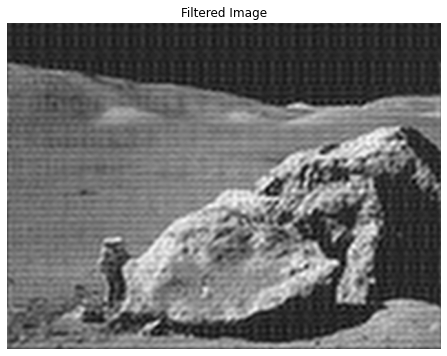

In [42]:
filtered = fftpack.ifft2(im_fft2).real

plt.figure(figsize=(12,6))
plt.imshow(filtered, cmap='gray')
plt.axis("off")
plt.title('Filtered Image')
plt.show()